
<h1 style="background-color: DarkOrchid; color: FloralWhite; padding:35px; border-radius: 8px; text-align: center; font-family: 'Times New Roman', serif;">
Proiect 7 - Clustering
</h1>

<h2 style="background-color: DarkOrchid; color: FloralWhite; padding: 17.5px; border-radius: 4px; text-align: Left; font-family: 'Times New Roman', serif;">
Explorarea inițială a datelor  </h2>


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Încărcarea setului de date 
try:
    df = pd.read_csv('cluster_1.csv')
except FileNotFoundError:
    print("Eroare: Fișierul 'cluster_1.csv' nu a fost găsit.")
    exit()

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h4 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.75px; border-radius: 2px; text-align: Left; font-family: 'Times New Roman', serif;">
Setul de date este conceput pentru a analiza calitatea vinului pe baza caracteristicilor sale. Scopul principal este modelarea relației dintre proprietățile vinului și scorul de calitate atribuit de experți.
</h4>

<h4 style="background-color: DarkOrchid; color: FloralWhite; padding: 14px; border-radius: 4px; text-align: Left; font-family: 'Times New Roman', serif;">
    <b> Descrierea setului de date:</b>
</h4>

1. **fixed_acidity** – Aciditatea fixă.

2. **volatile_acidity** – Aciditatea volatilă.

3. **citric_acid** – Acid citric.

4. **residual_sugar** – Zahăr rezidual.

5. **chlorides** – Cloruri

6. **free_sulfur_dioxide** – Dioxid de sulf liber.

7. **total_sulfur_dioxide** – Dioxid de sulf total.

8. **Density** – Densitate.

9. **pH** – pH-ul.

10. **sulphates** – Sulfati.

11. **alcohol** – Procent de alcool.

12. **quality** – Scor de calitate acordat vinului pe o scară de 0‑10.

In [27]:
df.shape

(1599, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Observatie: Setul nostru de date, nu are valori nule, deci nu trebuie sa eliminam.</h3>


In [31]:
df.duplicated().sum()

240

<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Observatie: Setul nostru de date are 240 de randuri duplicate, deci o sa le eliminam </h3>


In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

0

In [34]:
def clasificare(x):
    if 0 <= x <= 4:
        return 0
    elif 5 <= x <= 7:
        return 1
    elif 8 <= x <= 10:
        return 2
    else:
        return 0

df['target'] = df['quality'].apply(clasificare)


In [36]:
df = df.drop('quality',axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  target                1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


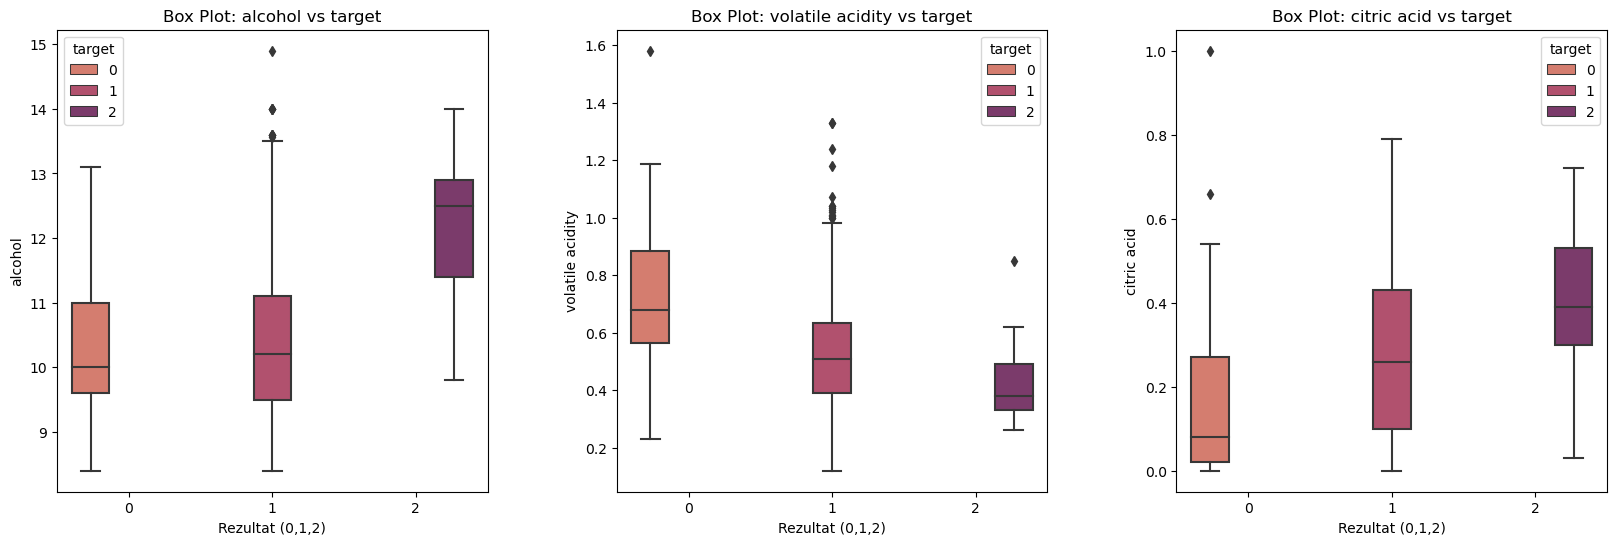

In [60]:
features = ['alcohol', 'volatile acidity', 'citric acid']

# Modificat la 1 rând și 3 coloane
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6)) 
plt.subplots_adjust(wspace=0.3) # hspace nu mai este necesar pentru un singur rând

for i, feature in enumerate(features):
    # Deoarece avem un singur rând, accesăm axele direct prin axes[i]
    ax = axes[i]
    sns.boxplot(x='target', y=feature, data=df, ax=ax, palette='flare', hue='target')
    
    ax.set_title(f'Box Plot: {feature} vs target')
    ax.set_xlabel('Rezultat (0,1,2)')
    ax.set_ylabel(feature)

# Eliminăm axa a patra (rămasă goală în vechiul cod) nu mai este necesară aici
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


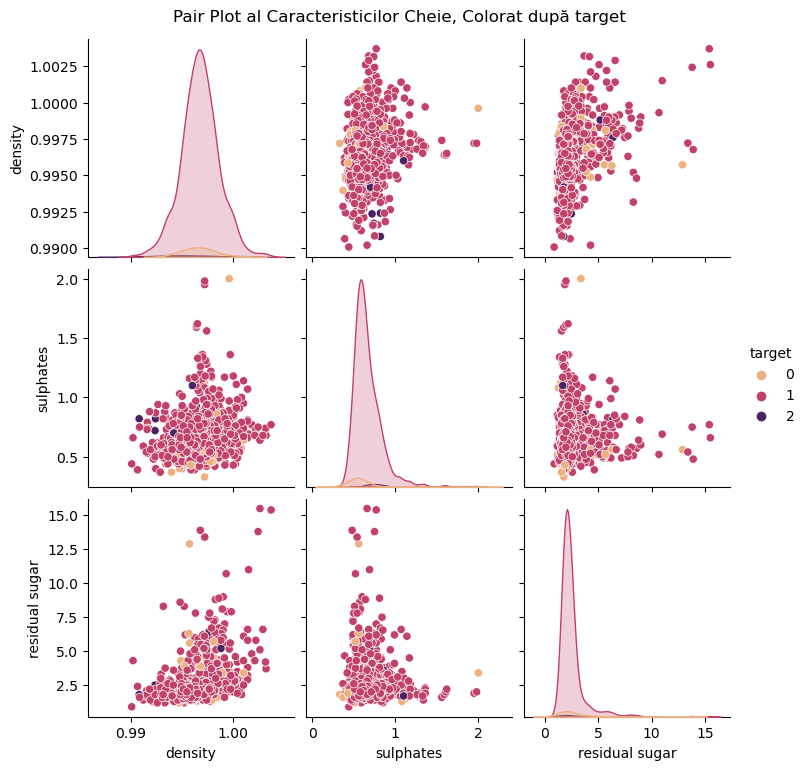

In [61]:
# 1. Adaugă 'target' în lista de coloane selectate
cols_subset = ['density', 'sulphates', 'residual sugar', 'target']

# 2. Rulează pairplot pe subsetul care acum include și coloana pentru hue
sns.pairplot(df[cols_subset].dropna(), hue='target', palette='flare', diag_kind='kde')

plt.suptitle('Pair Plot al Caracteristicilor Cheie, Colorat după target', y=1.02)
plt.show()


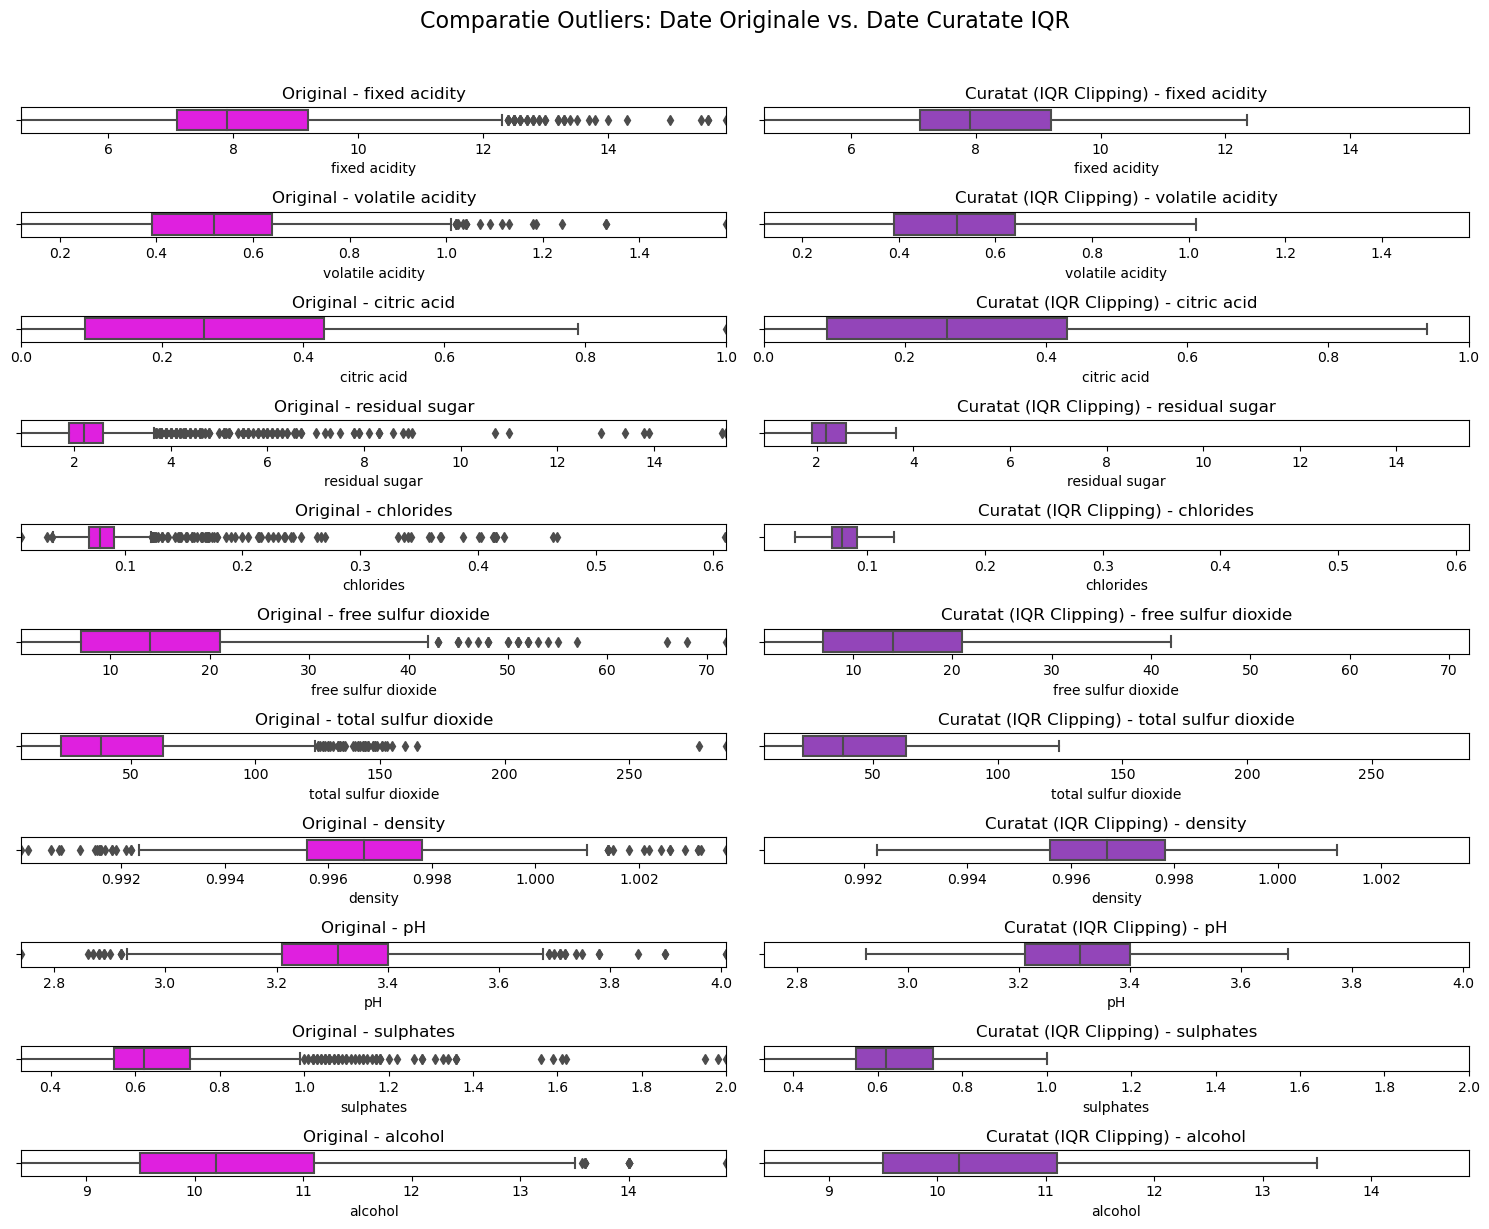

In [65]:
df_original=df.copy()
df_cleaned = df.copy()
cols_to_clip = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides'
               ,'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for col in cols_to_clip:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    


fig, axes = plt.subplots(len(cols_to_clip), 2, figsize=(15, 12))
plt.suptitle('Comparatie Outliers: Date Originale vs. Date Curatate IQR', y=1.02, fontsize=16)

for i, col in enumerate(cols_to_clip):
    sns.boxplot(x=df_original[col], ax=axes[i, 0], color='magenta')
    axes[i, 0].set_title(f'Original - {col}')
    axes[i, 0].set_xlim(df_original[col].min(), df_original[col].max()) 
    
    sns.boxplot(x=df_cleaned[col], ax=axes[i, 1], color='darkorchid')
    axes[i, 1].set_title(f'Curatat (IQR Clipping) - {col}')
    axes[i, 1].set_xlim(df_original[col].min(), df_original[col].max()) #

plt.tight_layout()
plt.show()


In [68]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target',axis=1)
Y = df['target']

X_scaled = StandardScaler().fit_transform(X)

<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Algoritmul K-Means.</h3>


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


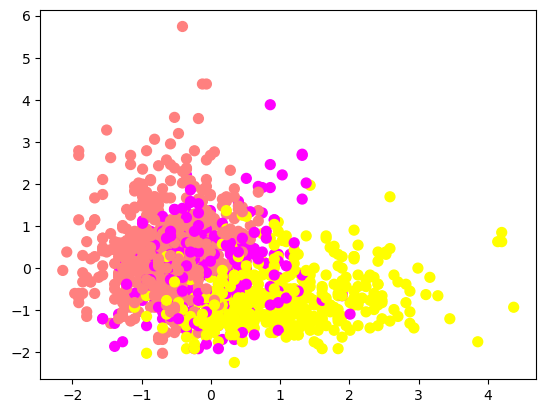

In [96]:
from sklearn.cluster import KMeans

# Aplicăm K-Means cu 3 clustere
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, s=50, cmap='spring')
plt.show()

In [128]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import fowlkes_mallows_score


ari_k = abs(adjusted_rand_score(Y, y_kmeans))
fms_k = fowlkes_mallows_score(Y, y_kmeans)
sil_k = silhouette_score(X_scaled, y_kmeans)

print(f"Adjusted Rand Index (ARI): {ari_k:.4f}")
print(f"Fowlkes-Mallows Score (FMS): {fms_k:.4f}")
print(f"Silhouette Score: {sil_k:.4f}")


Adjusted Rand Index (ARI): 0.0119
Fowlkes-Mallows Score (FMS): 0.5556
Silhouette Score: 0.1878


<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Concluzie : pentru 3 clustere, am obtinutul scorul Silhouett=0.1878,scorurile FM si ARI sunt slabe </h3>


<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Algoritmul DBSCAN.</h3>


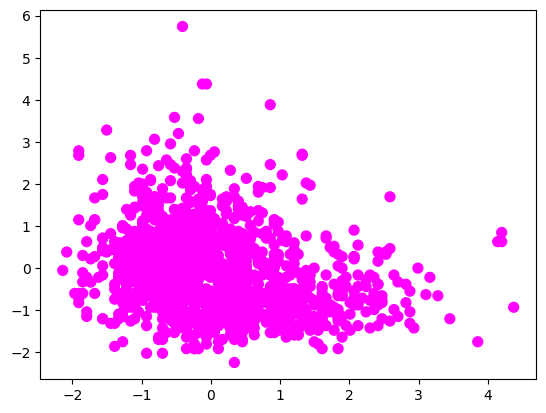

In [118]:
from sklearn.cluster import DBSCAN

X_scaled = StandardScaler().fit_transform(X)
    
# Aplicăm DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_db, cmap='spring', s=50)
plt.show()

In [119]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import fowlkes_mallows_score


ari_db = adjusted_rand_score(Y, y_db)
fms_db = fowlkes_mallows_score(Y, y_db)
sil_db = 0

print(f"Adjusted Rand Index (ARI): {ari_db:.4f}")
print(f"Fowlkes-Mallows Score (FMS): {fms_db:.4f}")

Adjusted Rand Index (ARI): 0.0000
Fowlkes-Mallows Score (FMS): 0.9423


<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Concluzie : pentru 3 clustere, am obtinutul un scorul mai slab decat cel de la K-Means </h3>


<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Algoritmul Gaussian Mixture.</h3>


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


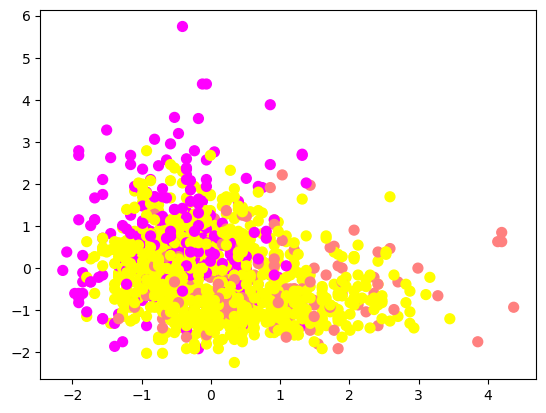

In [120]:
from sklearn.mixture import GaussianMixture
X_scaled = StandardScaler().fit_transform(X)
    
# Aplicăm Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = gmm.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_gmm, cmap='spring', s=50)
plt.show()

In [121]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import fowlkes_mallows_score


ari_gmm = adjusted_rand_score(Y, y_gmm)
fms_gmm = fowlkes_mallows_score(Y, y_gmm)
sil_gmm = silhouette_score(X_scaled, y_gmm)

print(f"Adjusted Rand Index (ARI): {ari_gmm:.4f}")
print(f"Fowlkes-Mallows Score (FMS): {fms_gmm:.4f}")
print(f"Silhouette Score: {sil_gmm:.4f}")


Adjusted Rand Index (ARI): 0.0342
Fowlkes-Mallows Score (FMS): 0.6827
Silhouette Score: 0.1183


<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Concluzie : pentru 3 clustere, am performanta mai buna fata de K-Means </h3>


<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Tabel Comparativ și Concluzii Finale.</h3>


In [126]:
#------------------------
# Crearea DataFrame-ului
#------------------------
data = pd.DataFrame({
    "Titlu algorithm": ['KMeans','DBScan','Gaussian'],
    "ARI": [ari_k,ari_db,ari_gmm],
    "FMS": [fms_k,fms_db,fms_gmm],
    "Silhouette": [sil_k,sil_db,sil_gmm]
})


data

,Titlu algorithm,ARI,FMS,Silhouette
0,KMeans,-0.011925,0.555613,0.187754
1,DBScan,0.000000,0.942314,0.000000
2,Gaussian,0.034226,0.682726,0.118287


<h3 style="background-color: DarkOrchid; color: FloralWhite; padding: 8.85px; border-radius: 1.75px; text-align: Left; font-family: 'Times New Roman', serif;">
Concluzie: 
Algoritmul cel mai bun pentru metoda ARI este: GaussianMixture(0.0342) <br>
Algoritmul cel mai bun pentru metoda FM este GaussianMixture (0.6827)
</h3>
